In [59]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
iplbb=pd.read_csv('/content/drive/MyDrive/IPL_Ball_by_Ball_2008_2022.csv')

In [62]:
iplbb.tail()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225953,335982,2,15,2,SB Joshi,LR Shukla,P Kumar,NaN,0,0,0,0,1,SB Joshi,caught,BB McCullum,Royal Challengers Bangalore


In [63]:
players=sorted(iplbb.batter.unique())

In [64]:
iplbb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [65]:
# iplbb['ID'].unique()

In [66]:
def batsman30plus(batsman):
  b=iplbb[iplbb['batter']==batsman]
  d=b.groupby(['ID'])['batsman_run'].sum().reset_index()
  return len(d[d.batsman_run>30])

In [67]:
print(batsman30plus("V Kohli"))

93


[Text(0, 0, '66'),
 Text(0, 0, '54'),
 Text(0, 0, '56'),
 Text(0, 0, '60'),
 Text(0, 0, '85'),
 Text(0, 0, '57'),
 Text(0, 0, '54'),
 Text(0, 0, '59'),
 Text(0, 0, '79'),
 Text(0, 0, '69'),
 Text(0, 0, '86'),
 Text(0, 0, '74'),
 Text(0, 0, '52'),
 Text(0, 0, '93')]

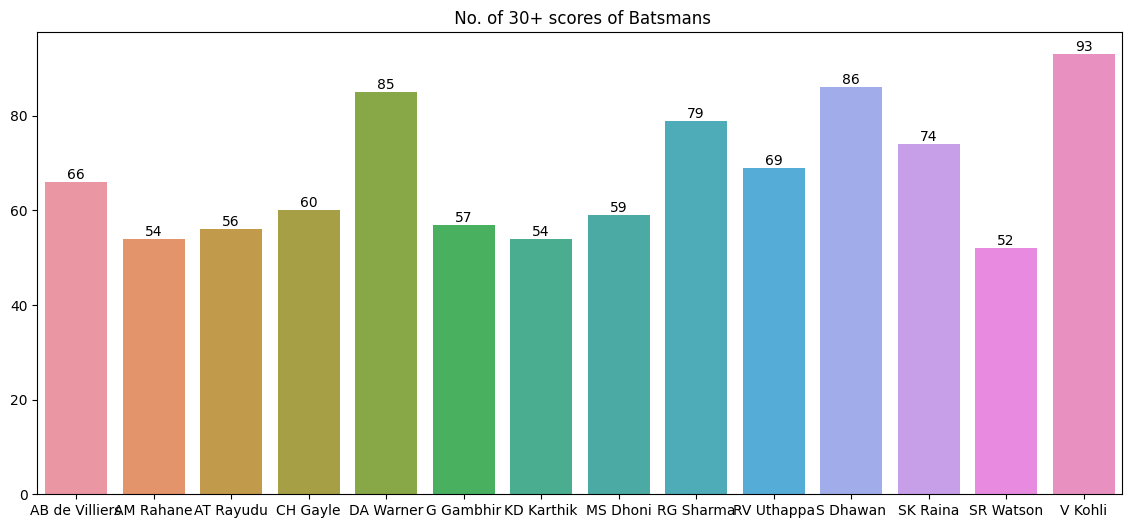

In [68]:
plus30=[]
batsman=[]
for i in players:
  r=batsman30plus(i)
  if r>50:
    plus30.append(r)
    batsman.append(i)
# df30plus=pd.DataFrame(batsman,plus30)
fig, ax = plt.subplots(figsize=(14, 6))
plt.title(" No. of 30+ scores of Batsmans")
sns.barplot(x=batsman,y=plus30,ax=ax,errwidth=0)
ax.bar_label(ax.containers[0])

In [69]:
# df30plus

In [70]:
def wickettakers(batter):
  d=[]
  b=iplbb[iplbb['batter']==batter]
  b.drop(b[b['isWicketDelivery'] == 0].index, inplace = True)
  w=[]
  for i in b.bowler:
    d.append(i)
  print(w)
  bowl=set(list(d))
  for i in bowl:
    w.append(d.count(i))
  df=pd.DataFrame(list(zip(bowl,w)),columns=['bowlers','no.of Wickets'])
  h=df[df['no.of Wickets']>3]
  fig, ax = plt.subplots(figsize=(14, 6))
  plt.title("{} wicket takers".format(batter))
  sns.barplot(x=h.bowlers,y=h['no.of Wickets'],ax=ax)
  ax.bar_label(ax.containers[0])

<ipython-input-70-b6b1d0b7914f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.drop(b[b['isWicketDelivery'] == 0].index, inplace = True)


[]


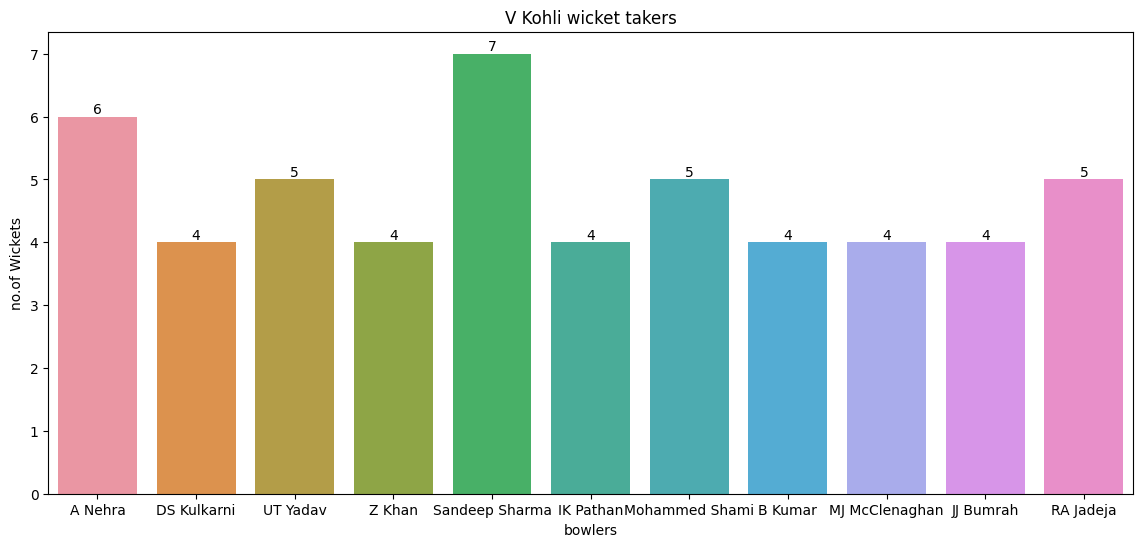

In [71]:
wickettakers("V Kohli")

In [72]:
# matchresult.sample(1)

In [73]:
iplbb['BattingTeam'].unique()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Delhi Daredevils', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala'], dtype=object)

In [74]:
not_present_team=['Rising Pune Supergiant',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala','Gujarat Titans','Lucknow Super Giants']
iplbb_pre=iplbb
for team in not_present_team:
  iplbb_pre.drop(iplbb[iplbb['BattingTeam']==team].index,inplace=True)

In [75]:
iplbb_pre['BattingTeam'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Delhi Daredevils'], dtype=object)

In [76]:
iplbb_pre.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
iplbb_pre.replace('Kings XI Punjab','Punjab Kings',inplace=True)


In [77]:
iplbb_pre.BattingTeam.unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders'],
      dtype=object)

In [78]:
iplbb_pre.sample(5)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
86790,1082601,1,3,4,M Vohra,CR Woakes,HM Amla,NaN,0,0,0,0,0,NaN,NaN,NaN,Punjab Kings
66465,1136599,2,18,1,C de Grandhomme,S Kaul,Mandeep Singh,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
219252,336010,2,2,1,S Chanderpaul,AB Dinda,J Arunkumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
75486,1136561,2,18,4,DJ Bravo,JJ Bumrah,Imran Tahir,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
19435,1254111,1,7,6,LS Livingstone,IC Porel,YBK Jaiswal,wides,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals


In [79]:
droped_col=["batter","bowler","non-striker","extra_type","batsman_run","extras_run",
            "non_boundary","isWicketDelivery","player_out","kind","fielders_involved","BattingTeam"]
# for col in droped_col:
iplbb_pre.drop(droped_col,inplace=True,axis=1)

In [80]:
iplbb_pre.sample(10)

,ID,innings,overs,ballnumber,total_run
149149,597999,1,8,4,4
116030,829713,2,5,2,6
127745,729309,1,17,7,0
92143,980995,1,0,3,0
164534,548318,2,14,5,0
74494,1136565,2,12,5,1
84930,1082609,2,1,5,0
201958,392227,2,6,6,1
211435,392186,2,3,2,1
199160,392238,1,9,1,1


In [81]:
iplbb_pre=iplbb_pre[iplbb_pre.overs<=6]
iplbb_pre1=iplbb_pre.groupby(iplbb_pre.ID)["total_run"].sum().reset_index()

In [82]:
iplbb_pre1.total_run/=2
iplbb_pre1.rename(columns = {'total_run':'innings_avg_score'}, inplace = True)

In [83]:
iplbb_pre1

,ID,innings_avg_score
0,335982,50.5
1,335983,65.5
2,335984,51.5
3,335985,50.0
4,335986,16.5
...,...,...
933,1304116,60.0
934,1312197,30.5
935,1312198,30.0
936,1312199,64.5


In [84]:
matchresult=pd.read_csv("/content/drive/MyDrive/IPL_Matches_Result_2008_2022.csv")
matchresult.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [85]:
matchresult['City'].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', nan, 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Bangalore', 'Kanpur', 'Rajkot', 'Raipur', 'Ranchi', 'Cuttack',
       'Dharamsala', 'Kochi', 'Nagpur', 'Johannesburg', 'Centurion',
       'Durban', 'Bloemfontein', 'Port Elizabeth', 'Kimberley',
       'East London', 'Cape Town'], dtype=object)

In [86]:
drop_city=['Ahmedabad','Dubai','Sharjah', 'Abu Dhabi','Visakhapatnam', 'Chandigarh', 'Indore',
            'Kanpur', 'Rajkot', 'Raipur', 'Ranchi', 'Cuttack','Kochi', 'Nagpur', 'Johannesburg', 'Centurion',
       'Durban', 'Bloemfontein', 'Port Elizabeth', 'Kimberley','East London', 'Cape Town']
matchresult_pre=matchresult
matchresult_pre['City'].replace('Navi Mumbai','Mumbai',inplace=True)
matchresult_pre['City'].replace('Bengaluru','Bangalore',inplace=True)
for city in drop_city:
  matchresult_pre.drop(matchresult_pre[matchresult_pre.City==city].index,inplace=True)

In [87]:
matchresult_pre['City'].unique()

array(['Kolkata', 'Mumbai', 'Pune', 'Delhi', 'Chennai', nan, 'Hyderabad',
       'Bangalore', 'Jaipur', 'Dharamsala'], dtype=object)

In [88]:
matchresult_pre.Team1.unique()

array(['Royal Challengers Bangalore', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers'],
      dtype=object)

In [89]:
matchresult_pre=matchresult_pre[['ID','Team1',"Team2",'City']]
not_present_team=['Rising Pune Supergiant',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala','Gujarat Titans','Lucknow Super Giants']
for team in not_present_team:
  matchresult_pre.drop(matchresult_pre[matchresult_pre['Team1']==team].index,inplace=True)
  matchresult_pre.drop(matchresult_pre[matchresult_pre['Team2']==team].index,inplace=True)
matchresult_pre.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
matchresult_pre.replace('Kings XI Punjab','Punjab Kings',inplace=True)

<ipython-input-89-267957ea5d1e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchresult_pre.drop(matchresult_pre[matchresult_pre['Team1']==team].index,inplace=True)
<ipython-input-89-267957ea5d1e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchresult_pre.drop(matchresult_pre[matchresult_pre['Team2']==team].index,inplace=True)
<ipython-input-89-267957ea5d1e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchresult_pre.re

In [90]:
matchresult_pre.Team1.unique()

array(['Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Kolkata Knight Riders', 'Punjab Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Mumbai Indians'], dtype=object)

In [91]:
avg_inn=iplbb_pre1.merge(matchresult_pre,on='ID',how='right')

In [92]:
avg_inn

,ID,innings_avg_score,Team1,Team2,City
0,1304116,60.0,Sunrisers Hyderabad,Punjab Kings,Mumbai
1,1304115,37.0,Delhi Capitals,Mumbai Indians,Mumbai
2,1304114,71.0,Chennai Super Kings,Rajasthan Royals,Mumbai
3,1304111,59.0,Sunrisers Hyderabad,Mumbai Indians,Mumbai
4,1304110,63.0,Delhi Capitals,Punjab Kings,Mumbai
...,...,...,...,...,...
537,335989,58.0,Chennai Super Kings,Mumbai Indians,Chennai
538,335987,59.5,Rajasthan Royals,Punjab Kings,Jaipur
539,335985,50.0,Mumbai Indians,Royal Challengers Bangalore,Mumbai
540,335984,51.5,Delhi Capitals,Rajasthan Royals,Delhi


In [93]:
avg_inn.Team1.unique()

array(['Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Kolkata Knight Riders', 'Punjab Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Mumbai Indians'], dtype=object)

In [94]:
avg_inn.dropna()
avg_inn=pd.get_dummies(avg_inn)

In [95]:
avg_inn.drop('ID',inplace=True,axis=1)

In [96]:
avg_inn.head()

,innings_avg_score,Team1_Chennai Super Kings,Team1_Delhi Capitals,Team1_Kolkata Knight Riders,Team1_Mumbai Indians,Team1_Punjab Kings,Team1_Rajasthan Royals,Team1_Royal Challengers Bangalore,Team1_Sunrisers Hyderabad,Team2_Chennai Super Kings,...,Team2_Sunrisers Hyderabad,City_Bangalore,City_Chennai,City_Delhi,City_Dharamsala,City_Hyderabad,City_Jaipur,City_Kolkata,City_Mumbai,City_Pune
0,60.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,37.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,71.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,59.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,63.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [97]:
x=avg_inn.drop('innings_avg_score',axis=1)
y=avg_inn['innings_avg_score']

In [98]:
avg_inn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 541
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   innings_avg_score                  542 non-null    float64
 1   Team1_Chennai Super Kings          542 non-null    uint8  
 2   Team1_Delhi Capitals               542 non-null    uint8  
 3   Team1_Kolkata Knight Riders        542 non-null    uint8  
 4   Team1_Mumbai Indians               542 non-null    uint8  
 5   Team1_Punjab Kings                 542 non-null    uint8  
 6   Team1_Rajasthan Royals             542 non-null    uint8  
 7   Team1_Royal Challengers Bangalore  542 non-null    uint8  
 8   Team1_Sunrisers Hyderabad          542 non-null    uint8  
 9   Team2_Chennai Super Kings          542 non-null    uint8  
 10  Team2_Delhi Capitals               542 non-null    uint8  
 11  Team2_Kolkata Knight Riders        542 non-null    uint8  

In [99]:
from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(x,y)

In [100]:
from sklearn.linear_model import LinearRegression
m=LinearRegression()
m.fit(x1,y1)

LinearRegression()

In [101]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y2,m.predict(x2))))
print("Mean Squared Error (MSE): {}".format(mse(y2,m.predict(x2))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y2,m.predict(x2)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 7.601102941176471
Mean Squared Error (MSE): 94.47748161764706
Root Mean Squared Error (RMSE): 9.719952757994612


In [102]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(x1,y1)

DecisionTreeRegressor()

In [103]:
# Predicting results
y_pred_dt = decision_regressor.predict(x2)


# Decision Tree Regression - Model Evaluation
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y2, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y2, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y2, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 8.890730042016807
Mean Squared Error (MSE): 138.5496710923953
Root Mean Squared Error (RMSE): 11.770712429262526


In [104]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(x1,y1)

RandomForestRegressor()

In [105]:
# Predicting results
y_pred_rf = random_regressor.predict(x2)


# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y2, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y2, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y2, y_pred_rf))))


---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 8.488243702485972
Mean Squared Error (MSE): 122.66321761960768
Root Mean Squared Error (RMSE): 11.075342776619046


Note: Since Linear Regression model performs best as compared to other two, we use this model and boost it's performance using AdaBoost Algorithm

In [106]:
# AdaBoost Model using Linear Regression as the base learner
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(base_estimator=m, n_estimators=100)
adb_regressor.fit(x1, y1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100)

In [107]:
# Predicting results
y_pred_adb = adb_regressor.predict(x2)


# AdaBoost Regression - Model Evaluation
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y2, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y2, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y2, y_pred_adb))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 7.9140625
Mean Squared Error (MSE): 97.47561465992646
Root Mean Squared Error (RMSE): 9.872973952154764
